# SEED-V Dataset
In this notebook, we test the dataset, different splitting algoirthms for training, as well as visualize some samples from the dataset.

In [5]:
import matplotlib.pyplot as plt
from datasets.seedv import SeedVDataset
from datasets.splitters import RandomSplitter, LNSOSplitter, KFoldSplitter
from torch.utils.data import DataLoader

In [6]:
dataset = SeedVDataset(
    root_dir='C:\\Users\\adi\\Documents\\SEED-V\\',
    h5file='seedv12wnd.h5',
    participants=[1, 2],             
    sessions=[1, 2, 3],               
    emotions=[0, 1, 2, 3, 4],       
)

In [8]:
data_id = dataset.data_ids[0]
data_id_index = dataset.data_ids.index(data_id)
data, label = dataset[data_id_index]

print("Length of Dataset:", len(dataset))
print("Data_ID:", data_id)
print("Data:", data)

Length of Dataset: 1088
Data_ID: 1_1_1_31200
Data: tensor([[-0.1232, -0.1212, -0.1168,  ...,  0.2756, -0.1525, -0.0399],
        [-0.2021,  0.1215,  0.1545,  ...,  0.0671, -0.3651, -0.1252],
        [-0.1680, -0.2335, -0.0773,  ...,  0.0539, -0.1326, -0.1500],
        ...,
        [-0.2056, -0.7043,  0.0597,  ..., -0.0915,  0.4534,  0.3601],
        [-0.4976, -0.9518, -0.1918,  ..., -0.5017,  0.2621,  0.3377],
        [-0.1297, -0.3410,  0.1193,  ...,  0.1660,  0.4230,  0.4798]])


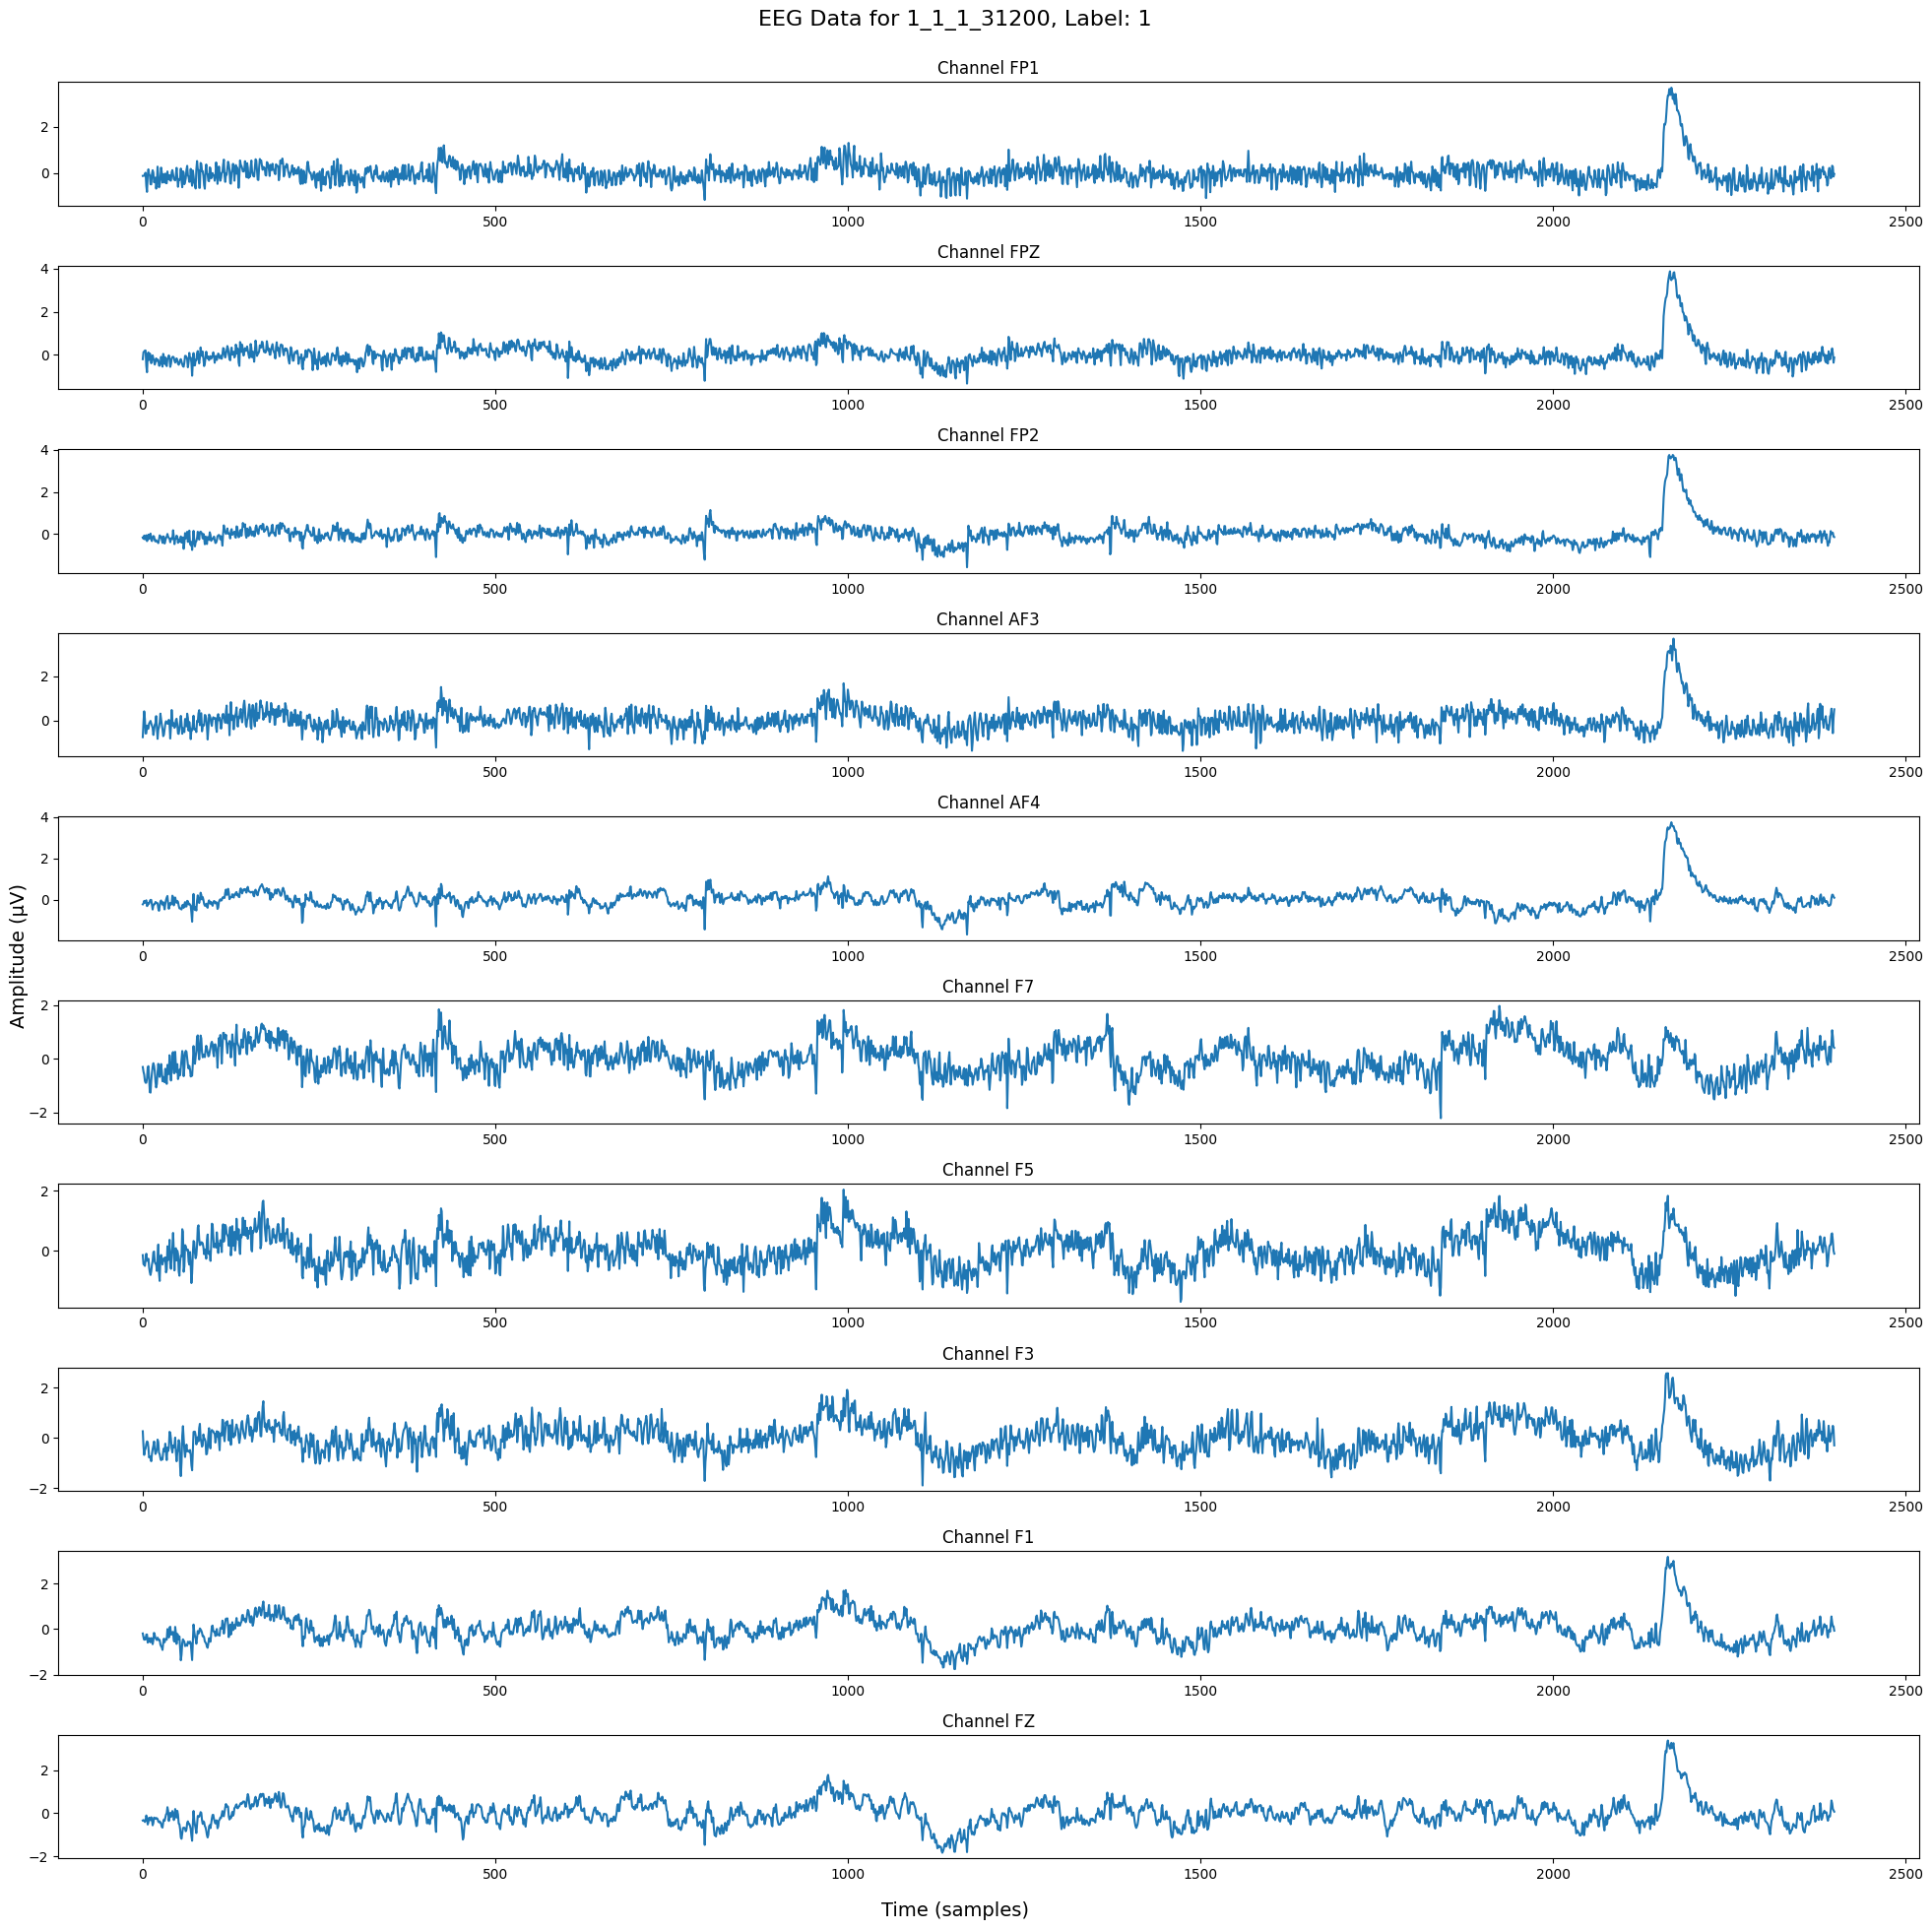

In [9]:
# Plot the 10 channels of the first data_id (participant_session_label) 

channel_names = ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2']
no_of_channels = 10
fig, axs = plt.subplots(no_of_channels, 1, figsize=(20, 20))

data_id = dataset.data_ids[0]
data_id_index = dataset.data_ids.index(data_id)
data, label = dataset[data_id_index]

# Plot each channel on a separate subplot
for i in range(no_of_channels):  # Loop over the first n channels
    axs[i].plot(data[i].numpy())  # Plot the i-th channel
    axs[i].set_title(f'Channel {channel_names[i]}')

fig.suptitle(f'EEG Data for {data_id}, Label: {label}', fontsize=16)
fig.supxlabel('Time (samples)', fontsize=14)
fig.supylabel('Amplitude (µV)', fontsize=14)

plt.tight_layout(rect=[0.005, 0.005, 1, 0.98])  # Leave space for global labels and title
plt.show()

## Split test
### Random Splitter

In [11]:
random_split = RandomSplitter(
    dataset=dataset,
    train_ratio=0.8,
    shuffle=True
)

rs_trainset = random_split.trainset
rs_testset = random_split.testset

In [12]:
assert len(dataset) == len(rs_trainset) + len(rs_testset)
len(dataset), len(rs_trainset), len(rs_testset)

(1088, 870, 218)

### Leave N Subjects Out (LNSO) Splitter

In [14]:
lnso_split = LNSOSplitter(
    dataset=dataset,
    num_participants=1,
)

lnso_trainset = lnso_split.trainset
lnso_testset = lnso_split.testset

In [15]:
assert len(dataset) == len(lnso_trainset) + len(lnso_testset)
len(dataset), len(lnso_trainset), len(lnso_testset)

(1088, 583, 505)

### K-fold Splitter

In [16]:
k = 10
kfold_split = KFoldSplitter(
    dataset=dataset,
    k=k,
    shuffle=True
)

for i in range(k):
    kfold_split.set_fold(i)
    kfold_trainset = kfold_split.trainset
    kfold_testset = kfold_split.testset

    assert len(dataset) == len(kfold_trainset) + len(kfold_testset)
    print(len(kfold_trainset), len(kfold_testset))

979 109
979 109
979 109
979 109
979 109
979 109
979 109
979 109
980 108
980 108
